In [5]:
import pandas as pd

import matplotlib.pyplot as plt


df=pd.read_csv('/Users/apple/Desktop/projects/2024_loksabha_elections/data/data.csv',index_col=0)


winners_df=df[df['rank']==1 & (df['party_name'] != 'Independent')]

top_ten_parties=winners_df.groupby('short_form')['short_form'].count()

 
top_ten_parties = top_ten_parties.rename('seats_won')


top_ten_parties_df = top_ten_parties.reset_index()

top_ten_parties_df.columns = ['party', 'seats']

top_ten_parties_df=top_ten_parties_df.sort_values(by=['seats'],ascending=False,ignore_index=True).head(10)

top_ten_parties_df


,party,seats
0,BJP,240
1,INC,99
2,SP,37
3,AITC,29
4,DMK,22
5,TDP,16
6,JD-U,12
7,SHSUBT,9
8,NCP-SP,8
9,SHS,7


Top 10 Parites by Seats won

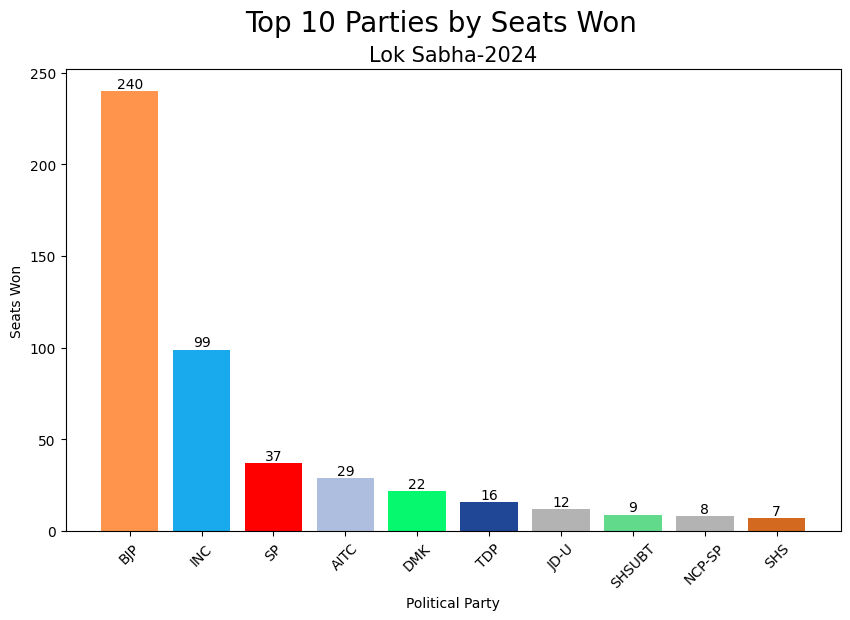

In [16]:
#Define labels and colors from ECI (https://results.eci.gov.in/PcResultGenJune2024/index.htm)

labels = ['BJP','INC','SP','AITC','DMK','TDP','JD(U)','SHSUBT','NCPSP','SHS','YSRCP','BSP','CPI-M','RJD']
colors = ['#ff944d','#19AAED','#ff0000','#aebedf','#05F86E','#204795','#39AC57','#61DA8C','#457A8B','#D2691E','#eb3734','#000078','#FF1D15','#D6901B']

# Map the colors to the parties
party_colors = {label: color for label, color in zip(labels, colors)}

# Extract the colors for the top ten parties
top_ten_colors = [party_colors.get(party, '#b3b3b3') for party in top_ten_parties_df['party']]


plt.figure(figsize=(10, 6))
bars = plt.bar(top_ten_parties_df['party'], top_ten_parties_df['seats'], color=top_ten_colors)

# Add labels on top of the bars
for bar, color in zip(bars, top_ten_colors):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval), va='bottom', ha='center', color='black')  # va: vertical alignment

plt.xlabel('Political Party')
plt.ylabel('Seats Won')
plt.suptitle('Top 10 Parties by Seats Won',fontsize=20)
plt.title('Lok Sabha-2024',fontsize=15)
plt.xticks(rotation=45)

plt.savefig('/Users/apple/Desktop/projects/2024_loksabha_elections/images/top_ten_seats.png')


plt.show()

Top 10 Parties by Votes Share

In [15]:

vote_share_df=df[df['party_name'] != 'Independent'].groupby('short_form')['total_votes'].sum()

#vote_share_df = df.groupby('short_form')['total_votes'].sum()


vote_share_df=vote_share_df.rename('vote_share')
vote_share_df = round(100*(vote_share_df / vote_share_df.sum()),2)


vote_share_df = vote_share_df.reset_index()

vote_share_df.columns = ['party', 'vote_share']

vote_share_df=vote_share_df.sort_values(by=['vote_share'],ascending=False,ignore_index=True).head(10)


vote_share_df





,party,vote_share
0,BJP,37.78
1,INC,21.89
2,SP,4.73
3,AITC,4.52
4,YSRCP,2.13
5,BSP,2.11
6,TDP,2.05
7,DMK,1.88
8,CPI-M,1.82
9,RJD,1.62


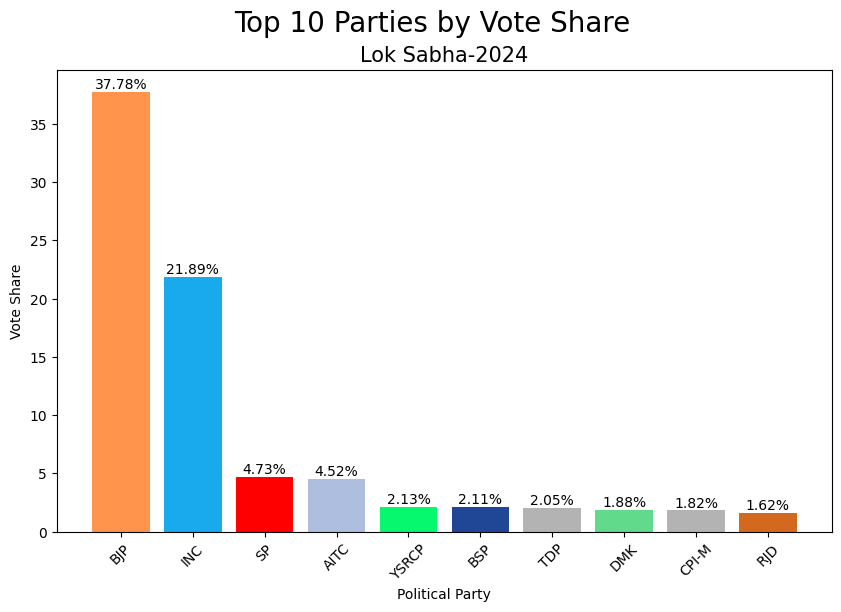

In [18]:
plt.figure(figsize=(10, 6))
bars = plt.bar(vote_share_df['party'], vote_share_df['vote_share'], color=top_ten_colors)

# Add labels on top of the bars
for bar, color in zip(bars, top_ten_colors):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f"{float(yval)}%", va='bottom', ha='center', color='black')  # Add % suffix

plt.xlabel('Political Party')
plt.ylabel('Vote Share')
plt.suptitle('Top 10 Parties by Vote Share',fontsize=20)
plt.title('Lok Sabha-2024',fontsize=15)
plt.xticks(rotation=45)

plt.savefig('/Users/apple/Desktop/projects/2024_loksabha_elections/images/top_ten_voteshare.png')


plt.show()